In [15]:
##This is Wills branch


In [38]:

import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [31]:
# Study data files
nashville_path = "/Users/willsmalley/Desktop/Group3/Resources/Nash_listings (3).csv"



# Read the mouse data and the study results
nashdata = pd.read_csv(nashville_path)


# Display the data table for preview
nashdata

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6.422000e+03,Home in Nashville · ★4.95 · 1 bedroom · 1 bed ...,12172,Michele,NaN,District 6,36.171430,-86.735700,Private room,43,30,674,3/3/2020,3.85,1,227,0,NaN
1,3.987000e+04,Home in Nashville · ★4.94 · 1 bedroom · 1 bed ...,171184,Evelyn,NaN,District 25,36.124660,-86.812690,Private room,70,1,401,9/12/2023,4.70,1,212,73,NaN
2,5.957600e+04,Home in Nashville · 1 bedroom · 1 bed · 1 priv...,812128,Patricia And John,NaN,District 12,36.189400,-86.591620,Private room,45,30,2,9/14/2022,0.13,9,89,0,NaN
3,7.290600e+04,Rental unit in Nashville · ★4.91 · 2 bedrooms ...,176117,Richard,NaN,District 18,36.131220,-86.800660,Entire home/apt,119,2,702,9/3/2023,4.70,1,47,44,NaN
4,2.588170e+05,Home in Nashville · ★4.77 · 1 bedroom · 2 beds...,22296,Diana,NaN,District 12,36.160760,-86.591510,Private room,39,30,96,12/14/2019,0.67,7,289,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8579,9.809940e+17,Hotel in Nashville · ★New · 1 bedroom · 2 beds...,501999514,RoomPicks,NaN,District 15,36.145543,-86.665091,Private room,255,1,0,NaN,NaN,20,359,0,NaN
8580,9.810030e+17,Hotel in Nashville · ★New · 1 bedroom · 2 beds...,501999514,RoomPicks,NaN,District 15,36.144118,-86.664730,Private room,255,1,0,NaN,NaN,20,359,0,NaN
8581,9.810810e+17,Home in Nashville · ★New · 3 bedrooms · 6 beds...,2442207,Stephen,NaN,District 17,36.136482,-86.787451,Entire home/apt,321,2,0,NaN,NaN,32,333,0,NaN
8582,9.812540e+17,Home in Nashville · ★New · 2 bedrooms · 3 beds...,20772148,GoodNight,NaN,District 21,36.146132,-86.817826,Entire home/apt,157,1,0,NaN,NaN,197,124,0,NaN


In [18]:
nyc_path = "/Users/willsmalley/Desktop/Group3/Resources/NYC_listings (2).csv"

nycdata = pd.read_csv(nyc_path)


# Display the data table for preview
nycdata

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2.595000e+03,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,240,30,49,6/21/2022,0.29,3,351,0,NaN
1,5.121000e+03,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.685350,-73.955120,Private room,66,30,50,12/2/2019,0.29,2,151,0,NaN
2,6.848000e+03,Rental unit in Brooklyn · ★4.58 · 2 bedrooms ·...,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81,30,191,8/14/2023,1.09,1,79,5,NaN
3,6.872000e+03,Condo in New York · 1 bedroom · 1 bed · 1 shar...,16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65,30,1,6/5/2022,0.06,2,295,0,NaN
4,7.064000e+03,Loft in Brooklyn · ★4.91 · 1 bedroom · 1 bed ·...,17297,Joelle,Brooklyn,Williamsburg,40.712480,-73.958810,Private room,95,30,13,9/12/2022,0.08,2,26,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38787,9.920600e+17,Rental unit in Brooklyn · ★New · 1 bedroom · 1...,539460712,Joshua,Brooklyn,Bedford-Stuyvesant,40.678169,-73.939933,Private room,87,30,0,NaN,NaN,1,269,0,NaN
38788,9.920910e+17,Rental unit in New York · ★New · 1 bedroom · 1...,525863186,Kevin,Manhattan,Upper East Side,40.775707,-73.953781,Entire home/apt,201,30,0,NaN,NaN,1,196,0,Exempt
38789,9.920970e+17,Rental unit in New York · ★New · 1 bedroom · 1...,539419395,Sarah Beth,Manhattan,Upper East Side,40.764607,-73.969537,Entire home/apt,250,20,0,NaN,NaN,1,247,0,Exempt
38790,9.927300e+17,Rental unit in New York · ★New · 3 bedrooms · ...,305240193,June,Manhattan,Hell's Kitchen,40.756104,-73.994073,Private room,92,30,0,NaN,NaN,428,123,0,NaN


In [32]:
nyc_stats = nycdata.groupby('neighbourhood').agg(
    Mean=pd.NamedAgg(column='price', aggfunc='mean'))
nyc_stats

,Mean
neighbourhood,
Allerton,126.347826
Arden Heights,127.833333
Arrochar,137.769231
Arverne,221.114583
Astoria,115.742812
...,...
Windsor Terrace,181.255319
Woodhaven,88.000000
Woodlawn,124.545455


In [33]:
nyc_groupstats = nycdata.groupby('neighbourhood_group').agg(
    Mean=pd.NamedAgg(column='price', aggfunc='mean'))
nyc_groupstats

,Mean
neighbourhood_group,
Bronx,126.117176
Brooklyn,158.753312
Manhattan,302.438628
Queens,132.639603
Staten Island,131.352151


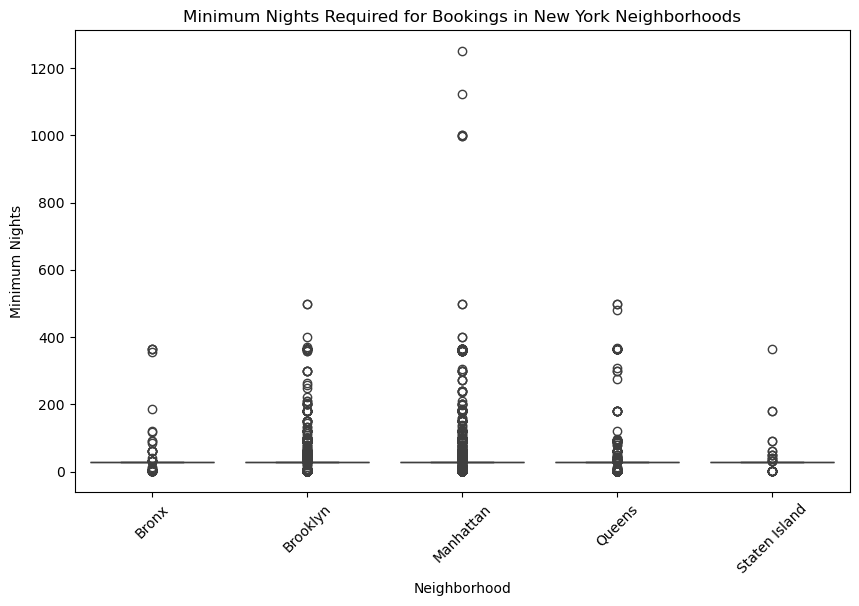

In [39]:
nyc_grouped = nycdata.groupby('neighbourhood_group')

# Create a box plot to visualize the minimum nights
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood_group', y='minimum_nights', data=nycdata, order=nyc_grouped.groups.keys())
plt.title('Minimum Nights Required for Bookings in New York Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Minimum Nights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()






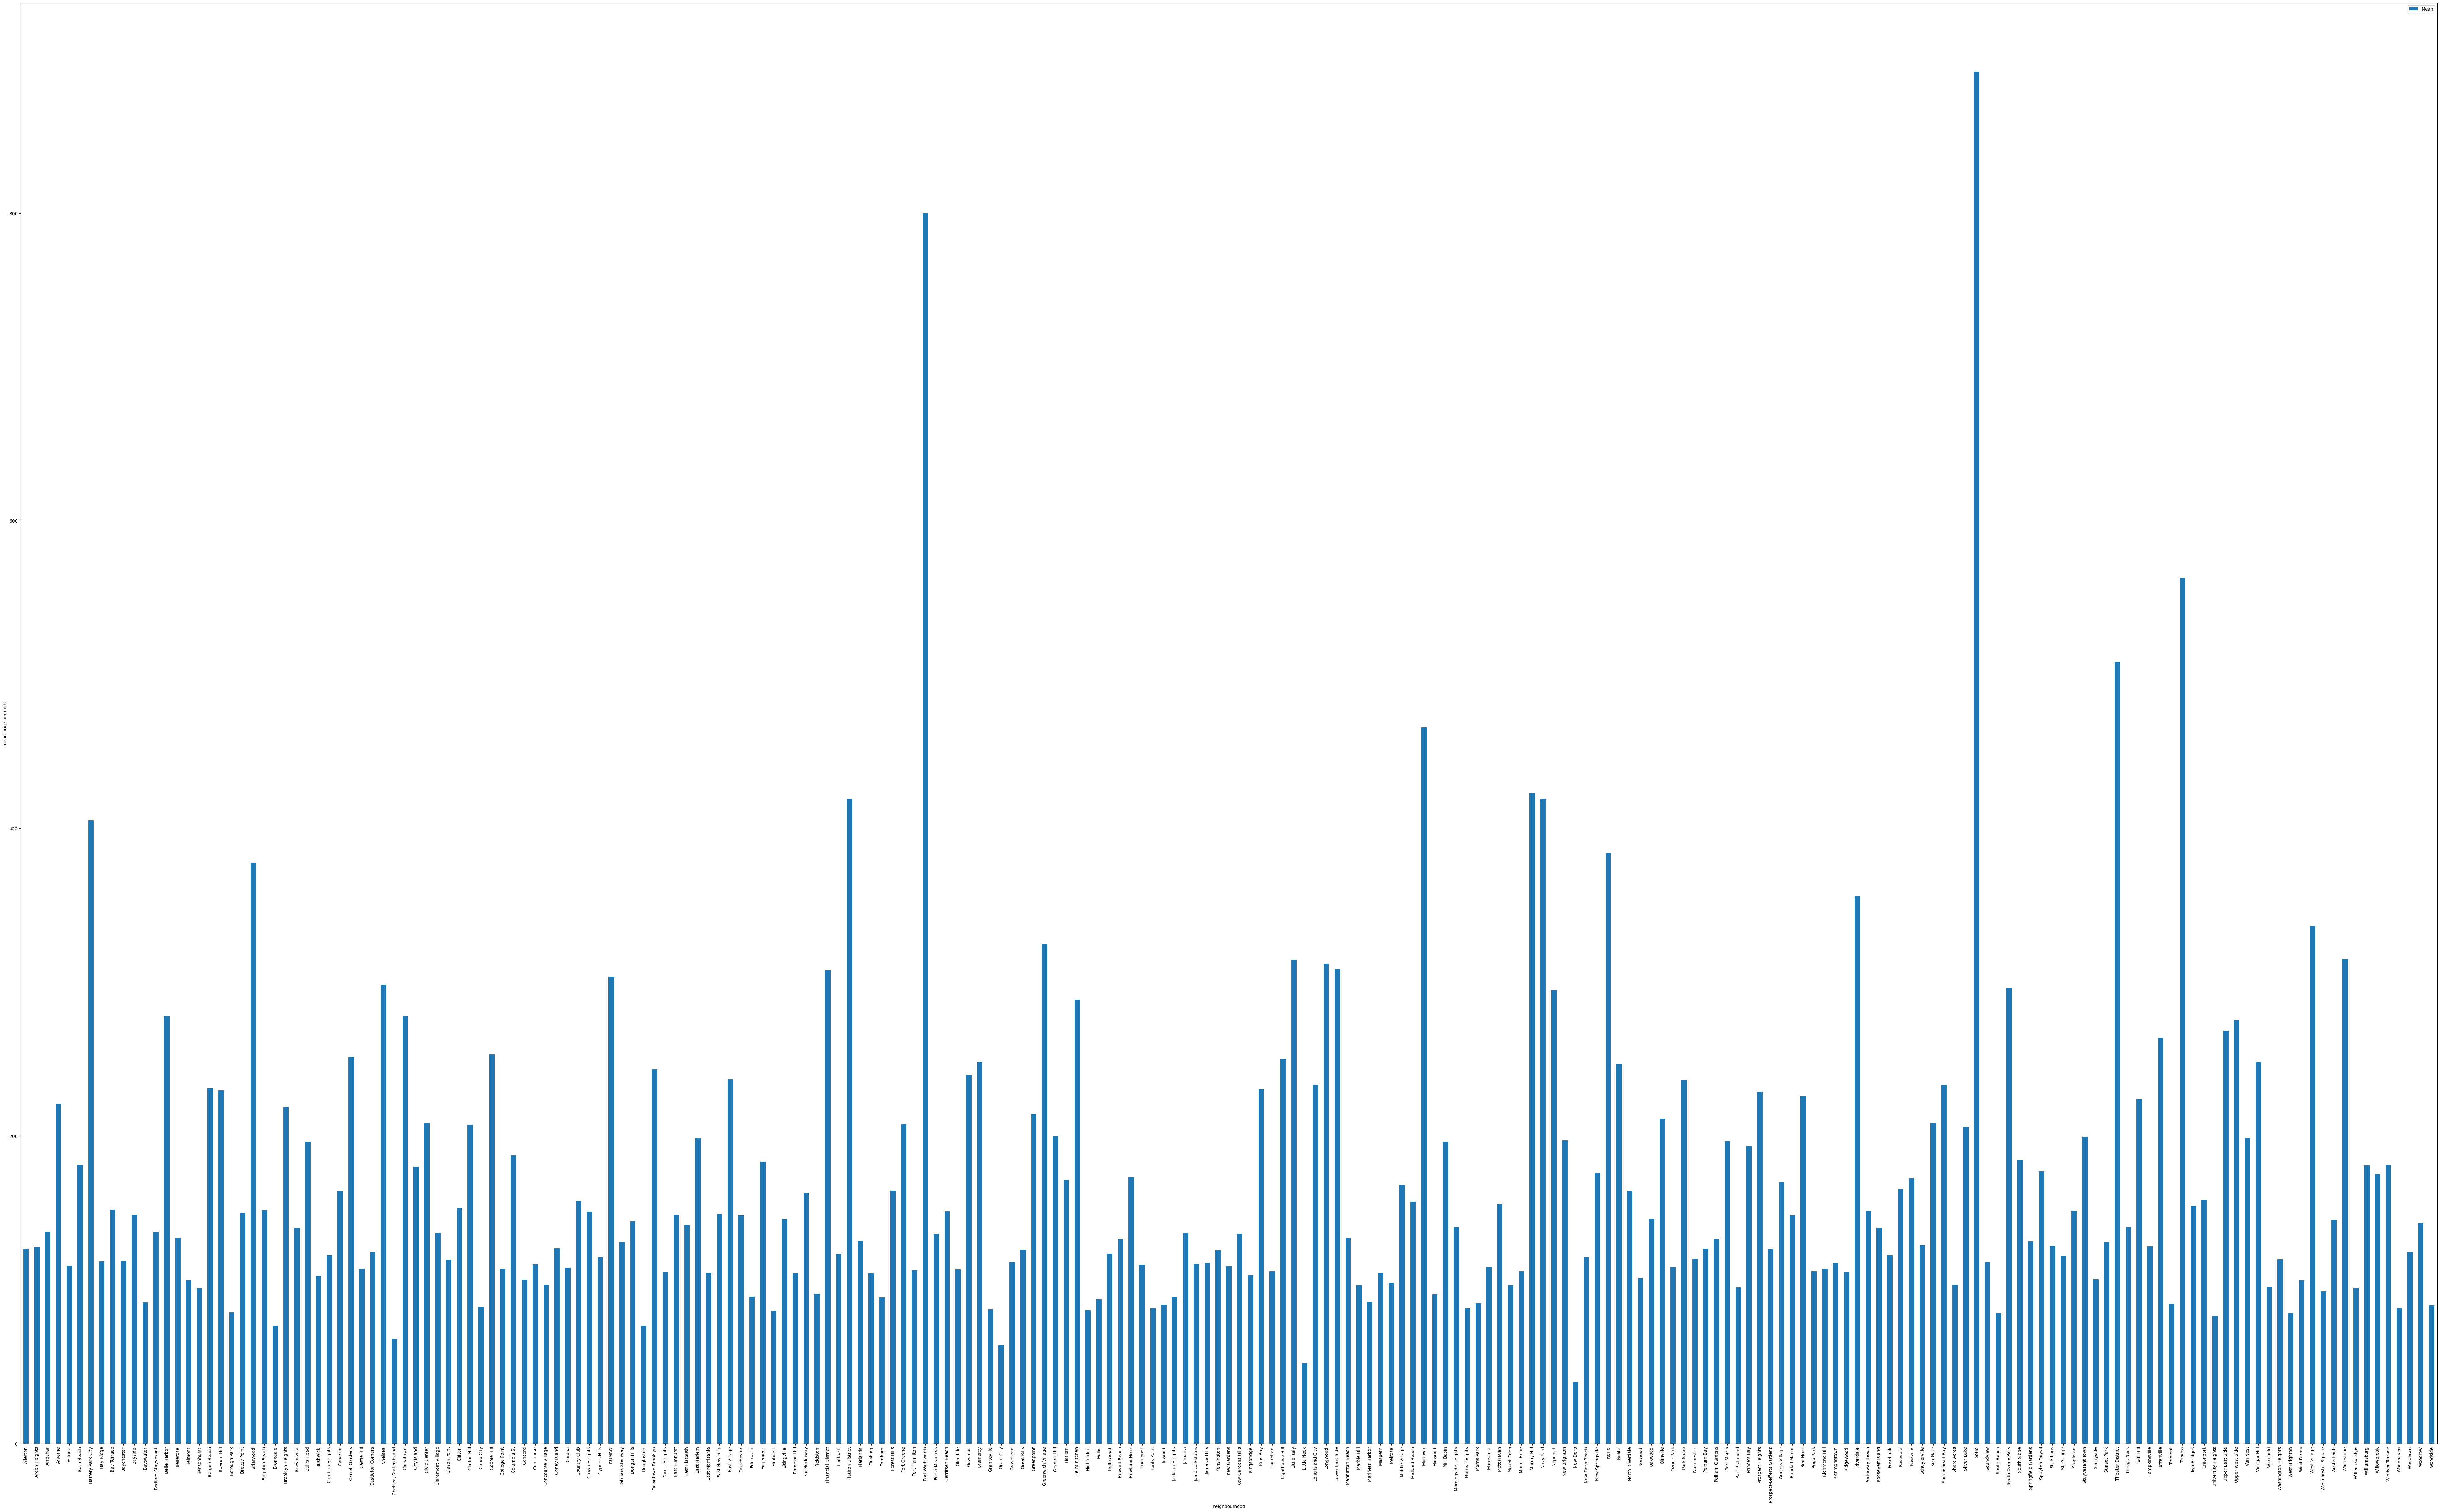

In [22]:
nyc_groupstats = nycdata.groupby('neighbourhood').agg(
    Mean=pd.NamedAgg(column='price', aggfunc='mean'))

# Plot the bar chart
nyc_groupstats.plot(kind='bar', y='Mean', figsize=(100, 60))
plt.xlabel('neighbourhood')
plt.ylabel('mean price per night')

plt.show()


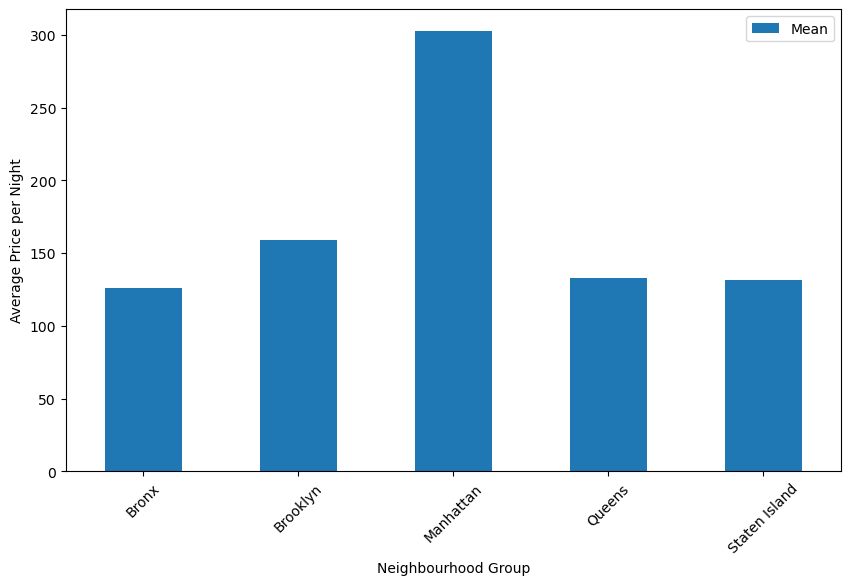

In [56]:

# Your DataFrame creation code remains the same
nyc_groupstats = nycdata.groupby('neighbourhood_group').agg(
    Mean=pd.NamedAgg(column='price', aggfunc='mean'))

# Plot the bar chart
nyc_groupstats.plot(kind='bar', y='Mean', figsize=(10, 6))
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price per Night')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

plt.show()


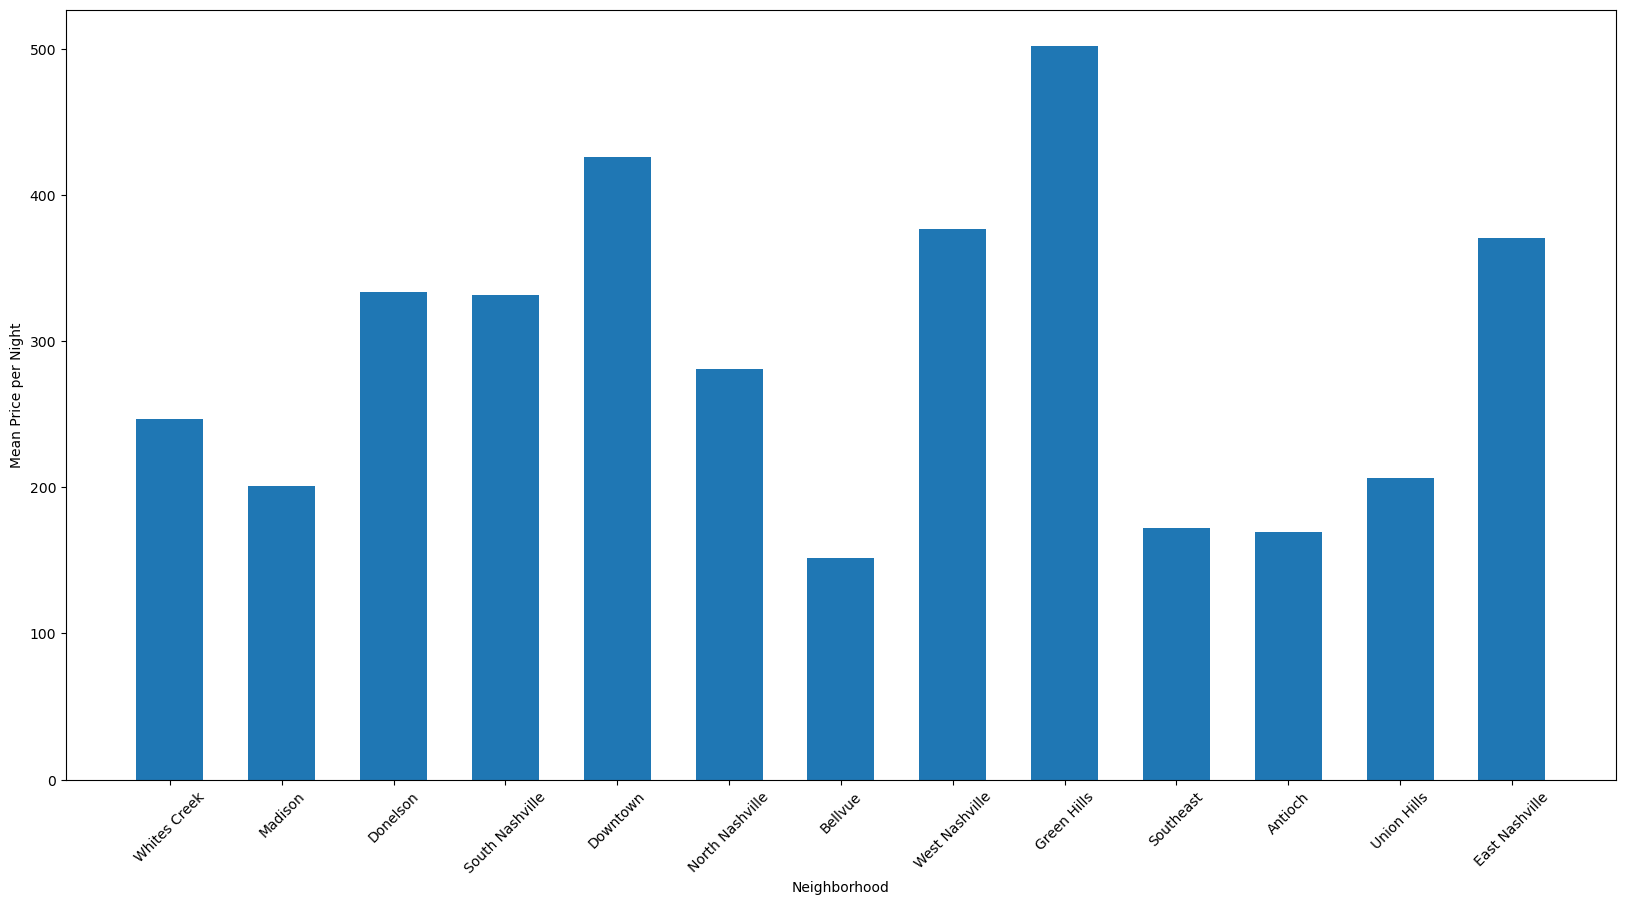

In [50]:
nash_groupstats = nashdata.groupby('neighbourhood').agg(
    Mean=pd.NamedAgg(column='price', aggfunc='mean'))

neighborhood_mapping = {
    "District 1": "Whites Creek",
    "District 2": "Whites Creek",
    "District 3": "Union Hills",
    "District 4": "Southeast",
    "District 26": "Southeast",
    "District 27": "Southeast",
    "District 30": "Southeast",
    "District 31": "Southeast",
    "District 5": "East Nashville",
    "District 6": "East Nashville",
    "District 7": "East Nashville",
    "District 8": "Madison",
    "District 9": "Madison",
    "District 10": "Madison",
    "District 11": "Donelson",
    "District 12": "Donelson",
    "District 13": "Donelson",
    "District 14": "Donelson",
    "District 15": "Donelson",
    "District 16": "South Nashville",
    "District 17": "South Nashville",
    "District 18": "South Nashville",
    "District 19": "South Nashville",
    "District 20": "Downtown",
    "District 21": "North Nashville",
    "District 22": "Bellvue",
    "District 23": "West Nashville",
    "District 24": "West Nashville",
    "District 25": "Green Hills",
    "District 34": "Green Hills",
    "District 35": "Bellvue",
    "District 28": "Antioch",
    "District 29": "Antioch",
    "District 32": "Antioch",
    "District 33": "Antioch",
}


# Plot the bar chart
Mean=pd.NamedAgg(column='price', aggfunc='mean')

# Replace district names with neighborhood names using the dictionary
nash_groupstats.reset_index(inplace=True)
nash_groupstats['neighbourhood'] = nash_groupstats['neighbourhood'].replace(neighborhood_mapping)

# Create the bar chart
plt.figure(figsize=(20, 10))  # Increase the figsize to make the chart bigger
plt.bar(nash_groupstats['neighbourhood'], nash_groupstats['Mean'], width=0.6)  # Adjust the bar width
plt.xlabel('Neighborhood')
plt.ylabel('Mean Price per Night')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

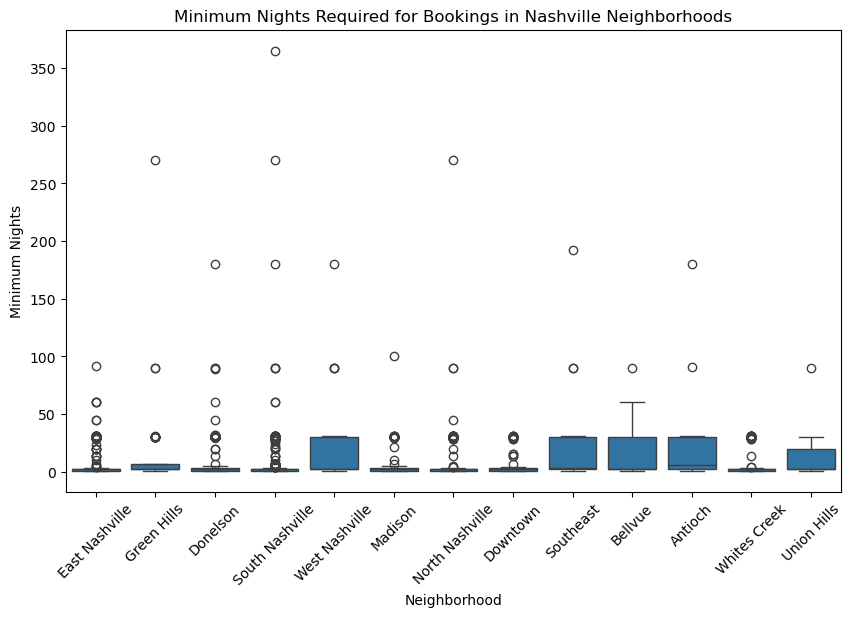

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your Nashville Airbnb data into 'nashdata'

# Create a dictionary to map district names to neighborhood names
neighborhood_mapping = {
    "District 1": "Whites Creek",
    "District 2": "Whites Creek",
    "District 3": "Union Hills",
    "District 4": "Southeast",
    "District 26": "Southeast",
    "District 27": "Southeast",
    "District 30": "Southeast",
    "District 31": "Southeast",
    "District 5": "East Nashville",
    "District 6": "East Nashville",
    "District 7": "East Nashville",
    "District 8": "Madison",
    "District 9": "Madison",
    "District 10": "Madison",
    "District 11": "Donelson",
    "District 12": "Donelson",
    "District 13": "Donelson",
    "District 14": "Donelson",
    "District 15": "Donelson",
    "District 16": "South Nashville",
    "District 17": "South Nashville",
    "District 18": "South Nashville",
    "District 19": "South Nashville",
    "District 20": "Downtown",
    "District 21": "North Nashville",
    "District 22": "Bellvue",
    "District 23": "West Nashville",
    "District 24": "West Nashville",
    "District 25": "Green Hills",
    "District 34": "Green Hills",
    "District 35": "Bellvue",
    "District 28": "Antioch",
    "District 29": "Antioch",
    "District 32": "Antioch",
    "District 33": "Antioch",
}

# Replace district names with neighborhood names using the dictionary
nashdata['neighbourhood'] = nashdata['neighbourhood'].replace(neighborhood_mapping)

# Group the data by neighborhood
nash_grouped = nashdata.groupby('neighbourhood')

# Create a box plot to visualize the minimum nights
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood', y='minimum_nights', data=nashdata)
plt.title('Minimum Nights Required for Bookings in Nashville Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Minimum Nights')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()



In [57]:
neighborhood_mapping = {
    "District 1": "Whites Creek",
    "District 2": "Whites Creek",
    "District 3": "Union Hills",
    "District 4": "Southeast",
    "District 26": "Southeast",
    "District 27": "Southeast",
    "District 30": "Southeast",
    "District 31": "Southeast",
    "District 5": "East Nashville",
    "District 6": "East Nashville",
    "District 7": "East Nashville",
    "District 8": "Madison",
    "District 9": "Madison",
    "District 10": "Madison",
    "District 11": "Donelson",
    "District 12": "Donelson",
    "District 13": "Donelson",
    "District 14": "Donelson",
    "District 15": "Donelson",
    "District 16": "South Nashville",
    "District 17": "South Nashville",
    "District 18": "South Nashville",
    "District 19": "South Nashville",
    "District 20": "Downtown",
    "District 21": "North Nashville",
    "District 22": "Bellvue",
    "District 23": "West Nashville",
    "District 24": "West Nashville",
    "District 25": "Green Hills",
    "District 34": "Green Hills",
    "District 35": "Bellvue",
    "District 28": "Antioch",
    "District 29": "Antioch",
    "District 32": "Antioch",
    "District 33": "Antioch",
}

# Replace district names with neighborhood names using the dictionary
nashdata['neighbourhood'] = nashdata['neighbourhood'].replace(neighborhood_mapping)

# Group the data by neighborhood
nash_grouped = nashdata.groupby('neighbourhood')

# Create a box plot to visualize the minimum nights
data.sort_values(by=['reviews_per_month'],inplace=True, ascending=False)
sns.set(style="darkgrid")
sns.set_palette("muted")
a = sns.catplot(x="neighbourhood_group", y="reviews_per_month",kind="swarm", data=data.head(1000),height=7)

NameError: name 'data' is not defined

In [25]:
# Create a base map centered around the average latitude and longitude values from the NYC data
m_nyc = folium.Map(location=[nycdata['latitude'].mean(), nycdata['longitude'].mean()], zoom_start=10)
# Convert the DataFrame columns to native Python lists and types
latitudes_nyc = nycdata['latitude'].astype(float).tolist()
longitudes_nyc = nycdata['longitude'].astype(float).tolist()
price_per_neighborhood_nyc = nycdata['price'].astype(float).tolist()
heat_data_nyc = list(zip(latitudes_nyc, longitudes_nyc, price_per_neighborhood_nyc))
# Create a heatmap for NYC
HeatMap(heat_data_nyc).add_to(m_nyc)
m_nyc

In [28]:
# Create a base map centered around the average latitude and longitude values from the NYC data
m_nash = folium.Map(location=[nashdata['latitude'].mean(), nashdata['longitude'].mean()], zoom_start=10)
# Convert the DataFrame columns to native Python lists and types
latitudes_nash = nashdata['latitude'].astype(float).tolist()
longitudes_nash = nashdata['longitude'].astype(float).tolist()
price_per_neighborhood_nash = nashdata['price'].astype(float).tolist()
heat_data_nash = list(zip(latitudes_nash, longitudes_nash, price_per_neighborhood_nash))
# Create a heatmap for NYC
HeatMap(heat_data_nash).add_to(m_nash)
m_nash